

# Data Exploration and Visualizations

*Exploratory Data Analysis (EDA)* is the process where a Data Scientist gathers information 
from a dataset. This inclues knowing the source of the data, an understading 
of what the data itself represents, the features that describe the data, the type 
of data in each feature, and what stories comes out from the data. 

Data visualisation is the most agile method to acquire information from a dataset.





In [19]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# First things first... load the data

In [20]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<img src='https://ib.bioninja.com.au/_Media/flower-labelled_med.jpeg'>

In [21]:
df['class'].value_counts()

Iris-virginica     54
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

<img src='https://i.imgur.com/RcxYYBA.png'>

### Lets see how 'big' our data is by printing its shape.

In [22]:
print(df.shape)

(154, 5)


# Lets look at the description and information about our dataset.
* Why, it gives us a high level summary view of our data.

In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,153.000000,153.000000,153.000000,153.000000
mean,6.885621,3.582353,4.684967,1.567320
std,7.439603,3.772792,6.799679,2.722297
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,59.000000,30.000000,51.000000,20.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  153 non-null    float64
 1   sepal_width   153 non-null    float64
 2   petal_length  153 non-null    float64
 3   petal_width   153 non-null    float64
 4   class         154 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


# Lets check if we have any null values in our data.

In [25]:
df.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           0
dtype: int64

### Remove, aka Drop, our null values

In [26]:
df.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           0
dtype: int64

In [27]:
print(df.shape)

# df.dropna(inplace=True)
df = df.dropna()

# Sanity Check
print(df.shape)

# pring how many null values there are
df.isnull().sum()

(154, 5)
(153, 5)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [28]:
# None, NULL, np.nan, N/A, 


# Check for duplicate rows.

In [29]:
print(df.duplicated().sum())
df.duplicated()

5


0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
151    False
152     True
153     True
Length: 153, dtype: bool

# Drop said duplicates...
Because `df.duplicated()` returns a selection boolean mask, where it is `True` when the row is duplicated, how would we use that to filter to remove the duplicated rows from our data set..?

In [30]:
# Ask students to solve this one...
print(df.shape, 'before dropping dupes')

# Another way to do the same thing
df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(153, 5) before dropping dupes
(148, 5) after dropping dupes


# Plotting
`df.plot(kind='scatter', x='COLUMN_NAME', y='COLUMN_NAME')`
```
The kinds of plot we can produce:
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        - 'scatter' : scatter plot
        - 'hexbin' : hexbin plot.`
```

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

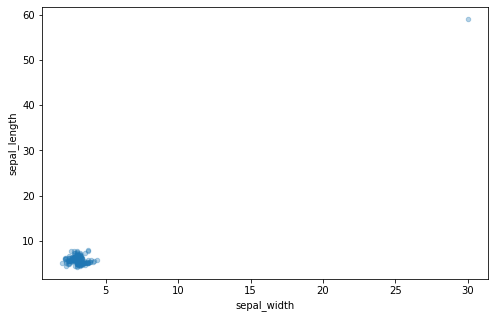

In [31]:
df.plot(kind='scatter', x='sepal_width', y='sepal_length', figsize=(8, 5), alpha=0.33)

# How do we remove this outlier...?

In [32]:
# Ask students to see if they can answer this. 

select_condition = df['sepal_width'] < 20

df = df[select_condition]


# More plotting.

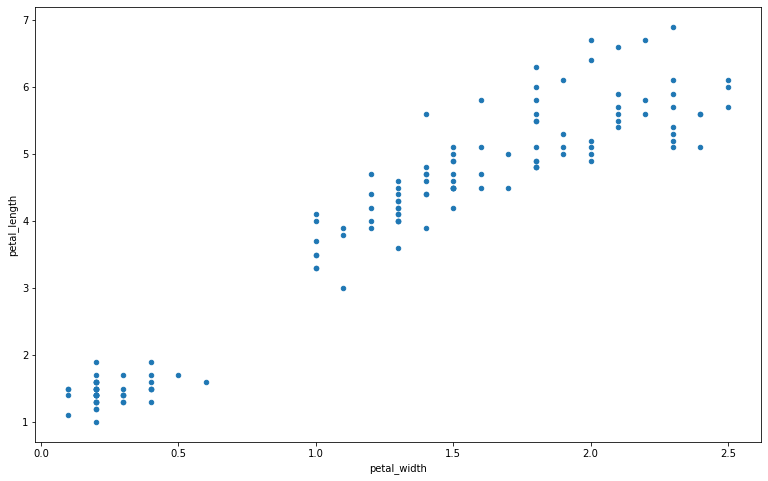

In [33]:

df.plot(kind='scatter', x='petal_width', y='petal_length', figsize=(13,8));

# Bar Charts

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='class'>

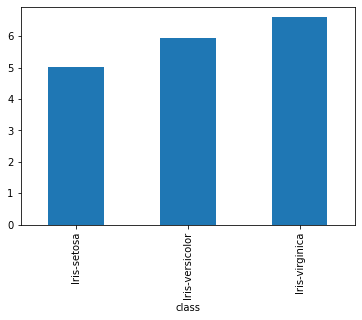

In [35]:
# Find the mean sepal_length for each of the classes 
gb = df.groupby('class')
sepal_mean = gb['sepal_length'].mean()
sepal_mean.plot(kind='bar')
# gb = df.groupby('class')['sepal_length'].mean()

# # # Make a bar plot of said means
# gb.plot(kind='bar');

# Histograms are great for finding what type of distribution the data is.

<AxesSubplot:ylabel='Frequency'>

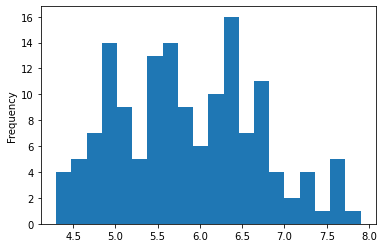

In [36]:
df['sepal_length'].plot(kind='hist', bins=20)

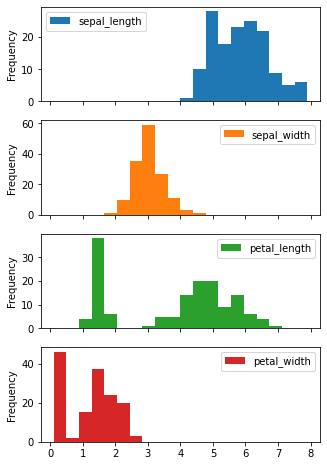

In [37]:
df.plot(bins=20, kind='hist', subplots=True, figsize=(5,8));

# Enter [Seaborn](https://seaborn.pydata.org/)
Seaborn is a visualization library that makes pretty plotting easy and fun. 
* Gallery of Examples:  https://seaborn.pydata.org/examples/index.html


### Scatter plots with Seaborn
* [Scatterplot Reference](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

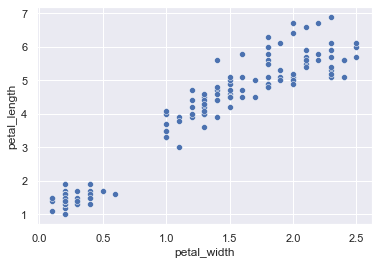

In [38]:
import seaborn as sns
# Dont forget to call sns.set()! 
sns.set()

# This tells the program to use the seaborn styles 
# Which make our graphs awesome looking


# Call using sns, and pass in the data frame.
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');

### Seaborn plotting functions return an `axis` object aka `ax`, which you can then set chart options on. 
* All the options you can set using the axis object.
    * https://matplotlib.org/3.3.1/api/axes_api.html

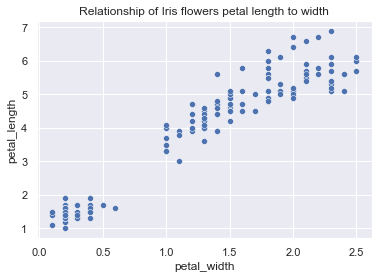

In [39]:
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');

ax.set_title("Relationship of Iris flowers petal length to width");

(0.0, 8.0)

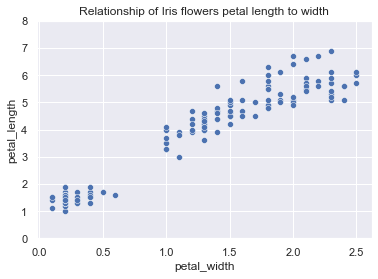

In [40]:
# Say you wanted to change the x-axis
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');

ax.set_title("Relationship of Iris flowers petal length to width");

ax.set_ylim(0, 8)

range(0, 16)

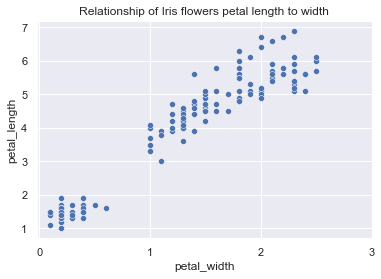

In [41]:
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');

ax.set_title("Relationship of Iris flowers petal length to width");

ax.set_xticks(range(0,4));
# ax.set_yticks(range(0,10));
range(0, 16, )

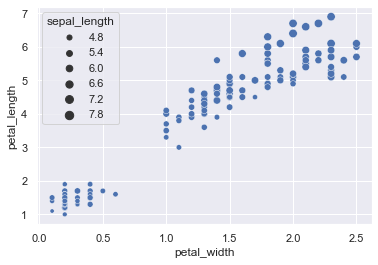

In [42]:
# Changing the size of the dots based on a column of our data.
sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length',
                size='sepal_length');

# What if we wanted to change the color of the markers based on the type of flower it is.
* Have students read documentation it to see if they can figure it out.
    * https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot


In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


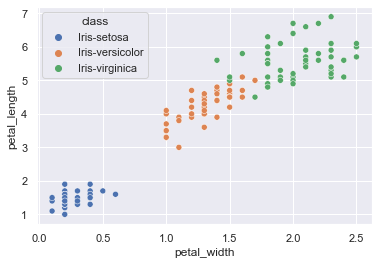

In [44]:
sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length', 
                hue='class');

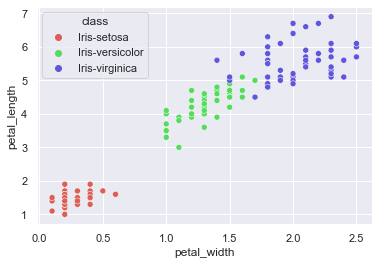

In [45]:
sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length', 
                hue='class', 
                palette='hls');

# The super scatter plot

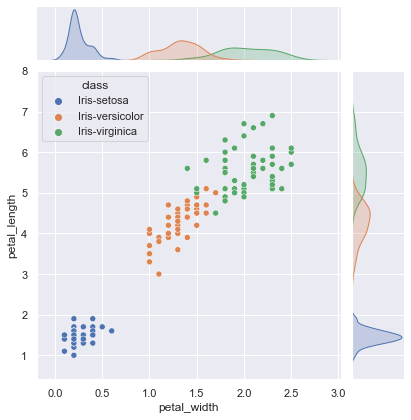

In [46]:
sns.jointplot(data=df, x='petal_width', y='petal_length', hue='class');

## Plotting the line of best fit
* Using `sns.regplot` and `sns.lmplot` you can easily plot regression analyses.

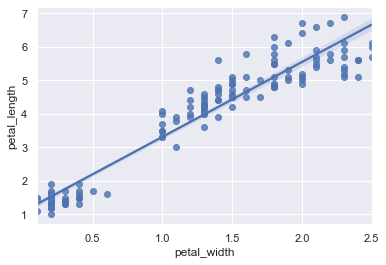

In [47]:
sns.regplot(data=df, x='petal_width', y='petal_length');

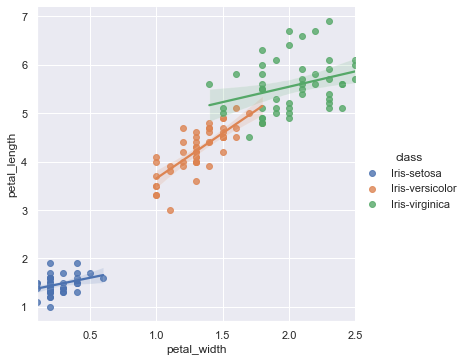

In [48]:
sns.lmplot(data=df, x='petal_width', y='petal_length', hue='class');

# Box Plots Are great for catching outliers
It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

* Minimum = Q1 -1.5 * IQR 
* Q1 = median of lower half of data
* Q2 = median of data
* Q3 = median of upper half of data
* Maximum = Q3 + 1.5 * IQR
* IQR = Q3 - Q1


<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

In [49]:
# Lets reload the data.
df = pd.read_csv('data/iris.csv')

# Drop Null values
df = df.dropna()


# Drop duplicates
df = df.drop_duplicates()

# Remove that one super outlier
df = df[df['sepal_width'] < 20]
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


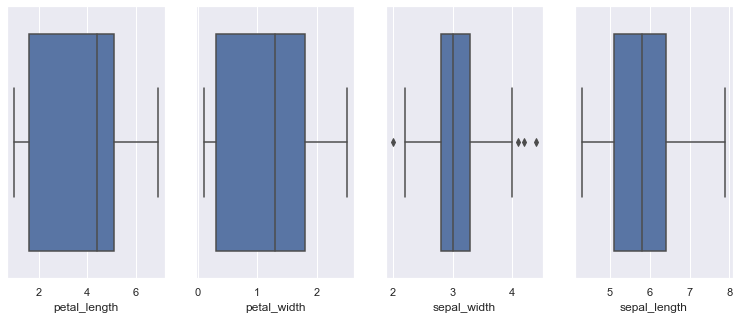

In [50]:
f, axes = plt.subplots(1, 4, figsize=(13,5))

ax = sns.boxplot(data=df, x='petal_length', ax=axes[0]);
ax = sns.boxplot(data=df, x='petal_width', ax=axes[1]);
ax = sns.boxplot(data=df, x='sepal_width', ax=axes[2]);
ax = sns.boxplot(data=df, x='sepal_length', ax=axes[3]);

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

In [51]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
# Calculate Q1
Q1 = df['sepal_width'].quantile(0.25)
Q1

# # # Calculate Q3
Q3 = df['sepal_width'].quantile(0.75)
Q3
# # # Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1
IQR
# # # Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['sepal_width'] < (Q1 - 1.5 * IQR)

# # # Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['sepal_width'] > (Q3 + 1.5 * IQR)
outliers_above
# # # Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ]


In [53]:
Q3

3.3

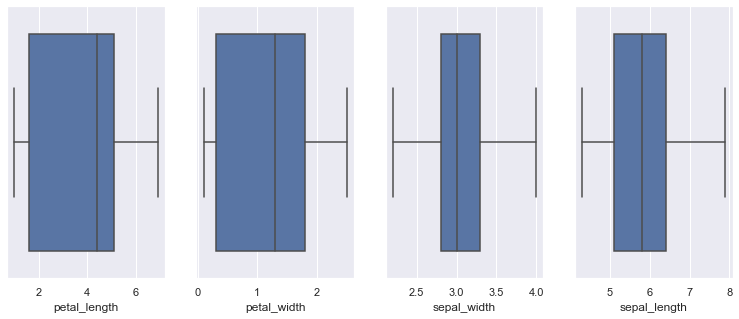

In [54]:
f, axes = plt.subplots(1, 4, figsize=(13,5))

ax = sns.boxplot(data=df, x='petal_length', ax=axes[0]);
ax = sns.boxplot(data=df, x='petal_width', ax=axes[1]);
ax = sns.boxplot(data=df, x='sepal_width', ax=axes[2]);
ax = sns.boxplot(data=df, x='sepal_length', ax=axes[3]);

# The 'catch all' plotting function.

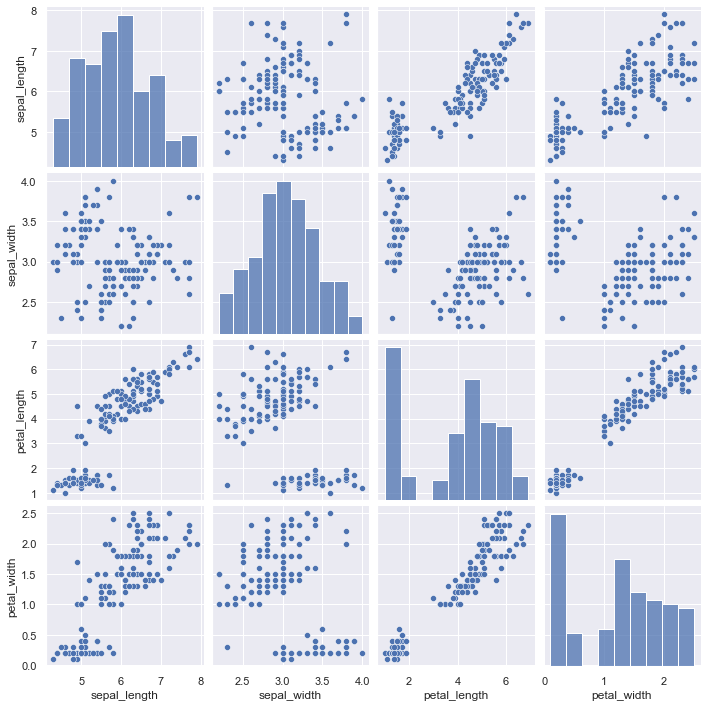

In [55]:
sns.pairplot(df);

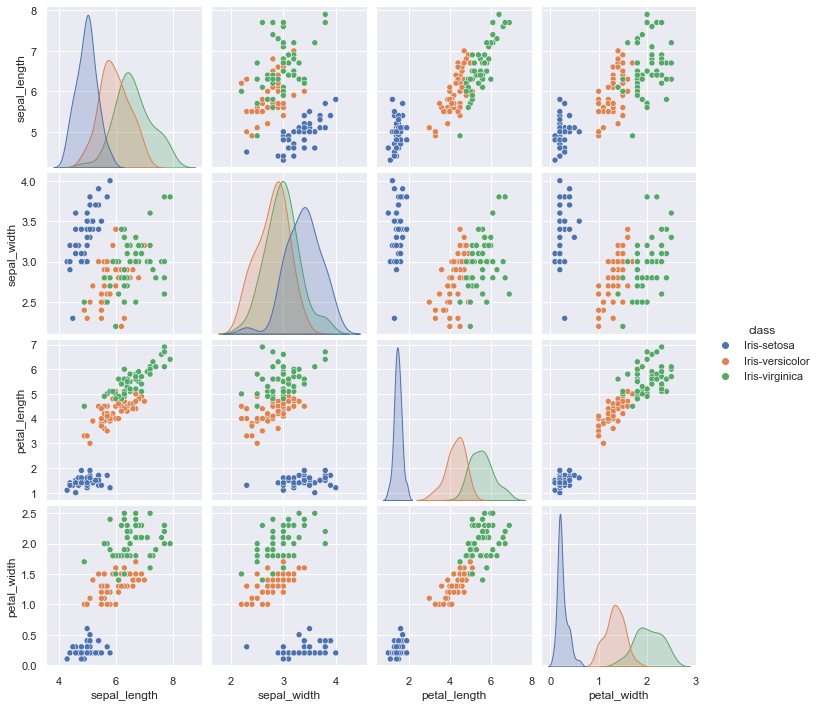

In [56]:
sns.pairplot(df, hue='class');

# Finding Correlations in your data.
In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. [Learn more here](https://en.wikipedia.org/wiki/Correlation_and_dependence)

<img src='https://www.onlinemathlearning.com/image-files/correlation-coefficient.png' width=500>

In [57]:
# This functions finds the correlation between all numerical values.
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113268,0.879015,0.821715
sepal_width,-0.113268,1.000000,-0.396539,-0.328102
petal_length,0.879015,-0.396539,1.000000,0.960785
petal_width,0.821715,-0.328102,0.960785,1.000000


# Easily visualize your correlations with a heatmap.

<AxesSubplot:>

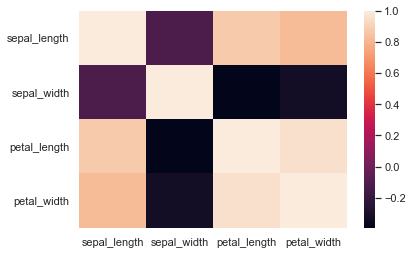

In [58]:
sns.heatmap(df.corr())

<AxesSubplot:>

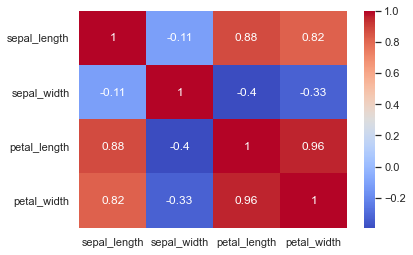

In [59]:
# sns.heatmap(df.corr(), annot=True, cmap='Spectral')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


# Now it's time for you to practice some EDA. Open up the Exercise notebook and begin coding!

# Dont forget to update your fork
* Then Every week, run these commands.
	1. `git fetch upstream`
	2. `git merge upstream/main`